<a href="https://colab.research.google.com/github/patibandlaswaroopa/FML/blob/main/Mnist_SIMPLEGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from torch import nn

In [2]:
transform = transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
]
)

In [3]:
dataset = torchvision.datasets.MNIST(root = 'dataset/',transform = transform,download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 168130762.63it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 8694157.31it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 124880668.05it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15692363.07it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [4]:
dataset.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [5]:
loader =DataLoader(dataset, batch_size = 32, shuffle = True)

In [6]:
next(iter(loader))

[tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         [[[-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           ...,
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.],
           [-1., -1., -1.,  ..., -1., -1., -1.]]],
 
 
         ...,
 
 
         [[[-1., -1., -1.,  ..., -

In [7]:
next(iter(loader))[0][0].permute((1,2,0)).shape

torch.Size([28, 28, 1])

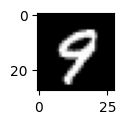

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,1))
plt.imshow(next(iter(loader))[0][0].permute((1,2,0)),cmap = 'gray')

In [9]:
class Discriminator(nn.Module):
  def __init__(self,in_features):
     super().__init__()

     self.disc = nn.Sequential(
        nn.Linear(in_features,128),
        nn.LeakyReLU(0.01),
        nn.Linear(128,1),
        nn.sigmoid()
     )
  def forward(self,x):
        return self.disc(x)


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import the functional module

class Discriminator(nn.Module):
    def __init__(self, in_features):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Use nn.Sigmoid() instead of nn.sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [11]:
class Generator(nn.Module):
  def __init__(self,z_dim,img_dim):
     super().__init__()

     self.gen = nn.Sequential(
        nn.Linear(z_dim,256),
        nn.LeakyReLU(0.01),
        nn.Linear(128,img_dim),
        nn.Tanh()
     )
  def forward(self,x):
        return self.gen(x)


In [12]:
z_dim = 64
image_dim = 28 * 28 * 1
device = 'cuda' if torch.cuda.is_available() else 'cpu'
disc = Discriminator(image_dim).to(device)
gen = Generator(z_dim,image_dim).to(device)
epochs =10

In [13]:
batch_size = 32
fixed_noise = torch.rand(batch_size, z_dim)

In [14]:
fixed_noise.shape

torch.Size([32, 64])

In [15]:
opt_disc = torch.optim.Adam(disc.parameters(),lr=3e-4)
opt_gen = torch.optim.Adam(disc.parameters(),lr=3e-4)
criterion = nn.BCELoss()

In [16]:
Writer_fake = SummaryWriter()
Writer_fake = SummaryWriter()
step=0

In [17]:
for epoch in range(epochs):
  for b,(real, _) in enumerate(loader):
    print(real.shape)
    break
  break


torch.Size([32, 1, 28, 28])


In [18]:
for epoch in range(epochs):
  for b,(real, _) in enumerate(loader):
    print(real.view(-1,784).shape)
    break
  break




torch.Size([32, 784])


In [19]:
import torch
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, z_dim, out_features):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, out_features),
            nn.Tanh()  # Using Tanh activation for the generator output
        )

    def forward(self, x):
        return self.model(x)

z_dim = 64
image_dim = 28 * 28 * 1
gen = Generator(z_dim, image_dim).to(device)


In [20]:
for epoch in range(epochs):
    for b, (real, _) in enumerate(loader):
        real = real.view(-1, 784).to(device)

        # Training discriminator
        noise = torch.rand(batch_size, z_dim).to(device)
        fake = gen(noise)

        # Check the sizes
        print(fake.shape)
        print(real.shape)

        break
    break


torch.Size([32, 784])
torch.Size([32, 784])


In [21]:
Writer_fake = SummaryWriter(f'logs/fake')
Writer_real  = SummaryWriter(f'logs/real')
step =0

In [22]:
28*28*1

784

In [ ]:
# Training loop
for epoch in range(epochs):
    for b, (real, _) in enumerate(loader):
        real = real.view(-1, 784).to(device)

        # Training discriminator
        noise = torch.rand(batch_size, z_dim).to(device)
        fake = gen(noise)

        disc_real = disc(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))

        disc_fake = disc(fake.detach()).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

        lossD = (lossD_real + lossD_fake) / 2

        disc.zero_grad()
        lossD.backward()
        opt_disc.step()

        # Training generator
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

        if b == 0:
            print(f"Epoch [{epoch}/{epochs}] Batch {b}/{len(loader)} | loss D: {lossD:.4f}, Loss G: {lossG:.4f}")

            with torch.no_grad():
                gen.eval()
                fixed_noise = torch.rand(batch_size, z_dim).to(device)
                fake = gen(fixed_noise).cpu().detach().numpy()[0, 0, :, :]
                fake_tensor = torch.tensor(fake, dtype=torch.float32)
                gen.train()

                img_grid_fake = torchvision.utils.make_grid(fake_tensor.unsqueeze(0).unsqueeze(0), normalize=True)
                img_grid_real = torchvision.utils.make_grid(torch.unsqueeze(real.cpu(), 1), normalize=True)

                Writer_fake.add_image('MNIST FAKE IMAGE', img_grid_fake, global_step=step)
                Writer_real.add_image('MNIST REAL IMAGE', img_grid_real, global_step=step)
                step += 1

                plt.figure(figsize=(1, 1))
                plt.imshow(fake[0].squeeze(), cmap='gray')
                plt.show()
